# MNIST Simples

Não tem base de dados externa, é importado a base de dados internamento do tensorflow

## Importando bibliotecas

In [15]:
!pip install -q tensorflow==2.16.1

In [16]:
# Importacao desta lib para desativar erro no TensorFlow
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils as np_utils
from keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical

## Importando base de dados

In [43]:
# Carregamento da base de dados (na primeira execução será feito o download)
(X_treinamento, y_treinamento), (X_teste, y_teste) = cifar10.load_data()

Text(0.5, 1.0, 'Classe [1]')

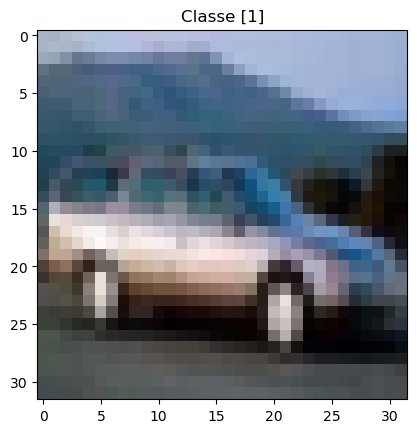

In [44]:
# Mostra a imagem e a respectiva classe, de acordo com o índice passado como parâmetro
# Você pode testar os seguintes índices para visualizar uma imagem de cada classe
# Avião - 650
# Pássaro - 6
# Gato - 9
# Veado - 3
# Cachorro - 813
# Sapo - 651
# Cavalo - 652
# Barco - 811
# Caminhão - 970
# Automóvel - 4
plt.imshow(X_treinamento[4])
plt.title('Classe '+ str(y_treinamento[4]))

## Pré-preparamento

In [45]:
# As dimensões dessas imagens é 32x32 e o número de canails é 3 pois vamos utilizar as imagens coloridas
previsores_treinamento = X_treinamento.reshape(X_treinamento.shape[0], 32, 32, 3)
previsores_teste = X_teste.reshape(X_teste.shape[0], 32, 32, 3)

In [46]:
# Conversão para float para podermos aplicar a normalização
previsores_treinamento = previsores_treinamento.astype('float32')
previsores_teste = previsores_teste.astype('float32')

In [47]:
# Normalização para os dados ficarem na escala entre 0 e 1 e agilizar o processamento
previsores_treinamento /= 255
previsores_teste /= 255

In [52]:
# Criação de variáveis do tipo dummy, pois teremos 10 saídas
classe_treinamento = np_utils.to_categorical(y_treinamento, 10)
classe_teste = np_utils.to_categorical(y_teste, 10)

## Estrutura da Rede Neural

In [53]:
# Criação da rede neural com duas camadas de convolução
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))

classificador.add(Conv2D(32, (3, 3), activation = 'relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2,2)))

classificador.add(Flatten())

In [54]:
# Rede neural densa com duas camadas ocultas
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units = 128, activation = 'relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(10, activation='softmax'))
classificador.compile(loss='categorical_crossentropy', 
                      optimizer="adam", metrics=['accuracy'])
classificador.fit(previsores_treinamento, classe_treinamento, 
                  batch_size=128, epochs=5, 
                  validation_data=(previsores_teste, classe_teste))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 93ms/step - accuracy: 0.3654 - loss: 1.7792 - val_accuracy: 0.3753 - val_loss: 1.8270
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 47s 119ms/step - accuracy: 0.5718 - loss: 1.2092 - val_accuracy: 0.5145 - val_loss: 1.4395
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.6427 - loss: 1.0150 - val_accuracy: 0.5551 - val_loss: 1.2955
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.6833 - loss: 0.8992 - val_accuracy: 0.6861 - val_loss: 0.9051
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 107ms/step - accuracy: 0.7148 - loss: 0.8121 - val_accuracy: 0.6652 - val_loss: 0.9748


In [56]:
test_loss, test_accuracy = classificador.evaluate(previsores_teste, classe_teste)
print(f"Acurácia no conjunto de teste: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6641 - loss: 0.9704
Acurácia no conjunto de teste: 0.67
